In [505]:
!pip install -q kaggle

In [506]:
!mkdir ~/.kaggle

In [507]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [508]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


# **Predict whether you will survive or not if you will be on Titanic**

In [509]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [510]:
train = pd.read_csv('train.csv')

In [511]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [512]:
train.shape

(891, 12)

In [513]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [514]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [515]:
train.astype('object').describe(include='all').loc['unique', :]

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
Name: unique, dtype: object

In [516]:
train.apply(lambda col: col.unique())

PassengerId    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Survived                                                  [0, 1]
Pclass                                                 [3, 1, 2]
Name           [Braund, Mr. Owen Harris, Cumings, Mrs. John B...
Sex                                               [male, female]
Age            [22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...
SibSp                                      [1, 0, 3, 4, 2, 5, 8]
Parch                                      [0, 1, 2, 5, 3, 4, 6]
Ticket         [A/5 21171, PC 17599, STON/O2. 3101282, 113803...
Fare           [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....
Cabin          [nan, C85, C123, E46, G6, C103, D56, A6, C23 C...
Embarked                                          [S, C, Q, nan]
dtype: object

In [517]:
train.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)

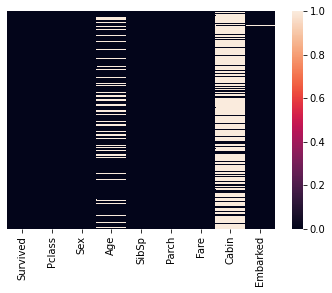

In [518]:
# Check for null values using heatmap 
sns.heatmap(train.isnull(),yticklabels=False)

In [519]:
# Or you can use use percentage to find null variables
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [520]:
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])

In [521]:
train.drop(columns=['Cabin'],axis=1,inplace=True)

In [522]:
# Print Unique values
train.apply(lambda col: col.unique())

Survived                                               [0, 1]
Pclass                                              [3, 1, 2]
Sex                                            [male, female]
Age         [22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...
SibSp                                   [1, 0, 3, 4, 2, 5, 8]
Parch                                   [0, 1, 2, 5, 3, 4, 6]
Fare        [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....
Embarked                                            [S, C, Q]
dtype: object

In [523]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [524]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

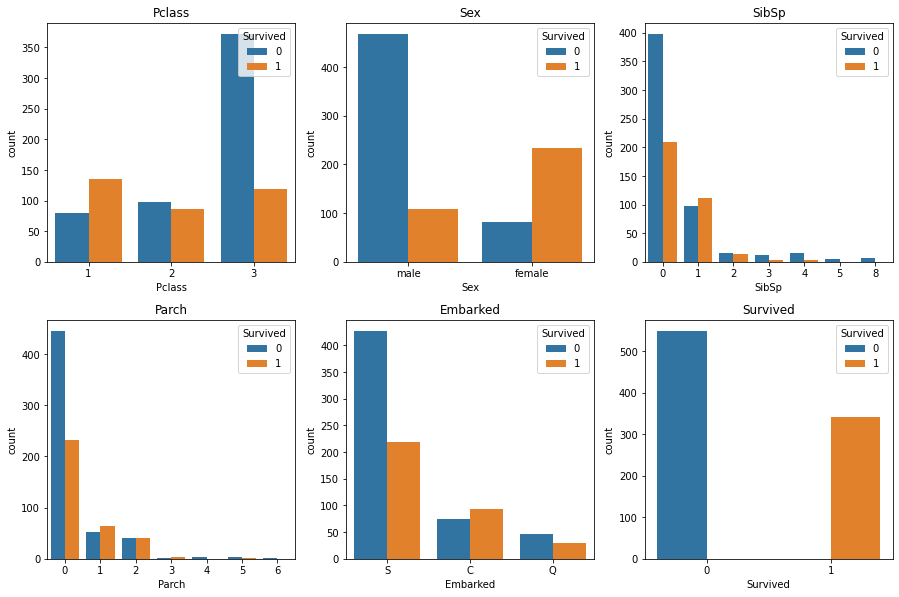

In [525]:
var_bar = ['Pclass' , 'Sex' , 'SibSp' , 'Parch' , 'Embarked', 'Survived']

no_rows = 2
no_cols = 3

fig, axs = plt.subplots(no_rows, no_cols, figsize = (no_cols * 4.2,no_rows * 4.2) )

for r in range(0, no_rows):
  for c in range(0, no_cols):
    i = r*no_cols + c 
    ax = axs[r][c]
    sns.countplot(train[var_bar[i]], hue=train['Survived'], ax=ax)
    ax.set_title(var_bar[i])
    ax.legend(title='Survived', loc = 'upper right')

  plt.tight_layout()

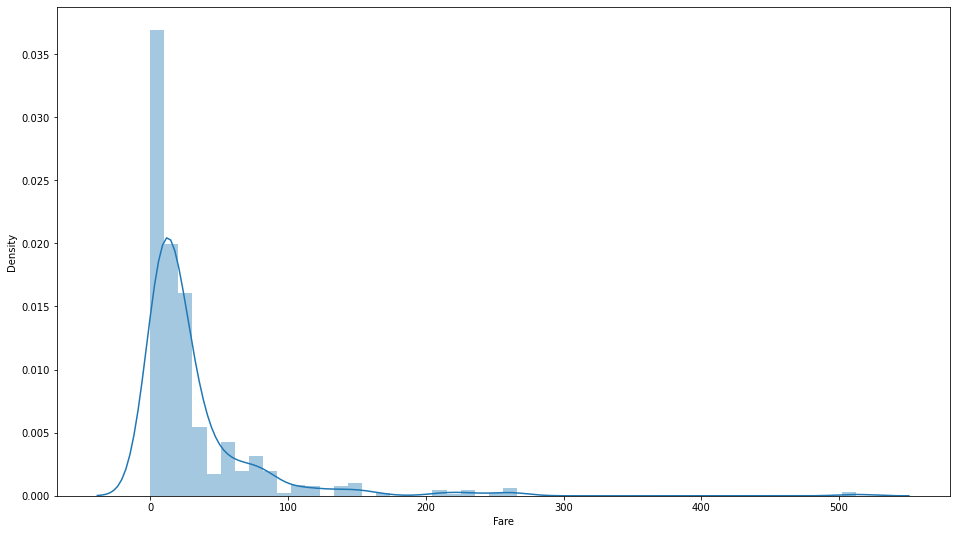

In [526]:
plt.figure(figsize=(16,9))
sns.distplot(train['Fare'])

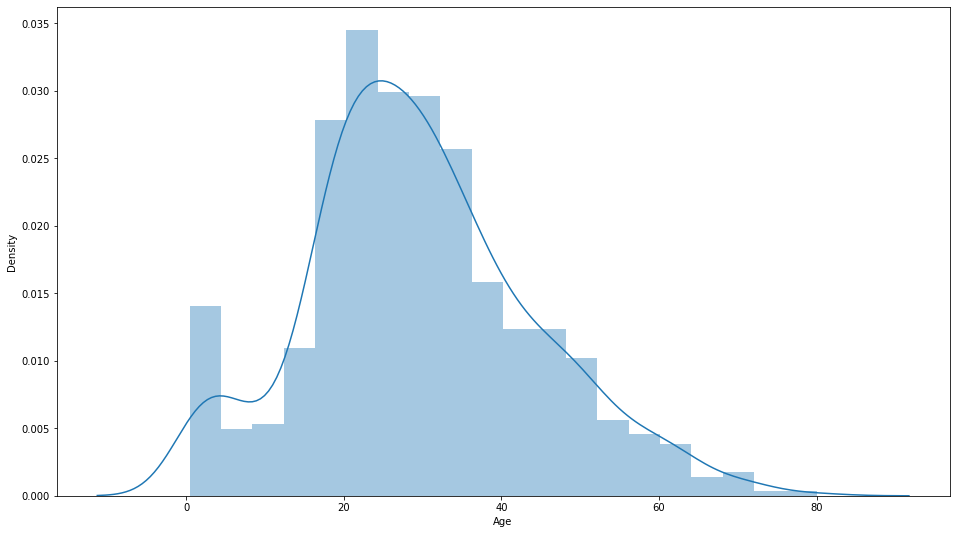

In [527]:
plt.figure(figsize=(16,9))
sns.distplot(train['Age'])

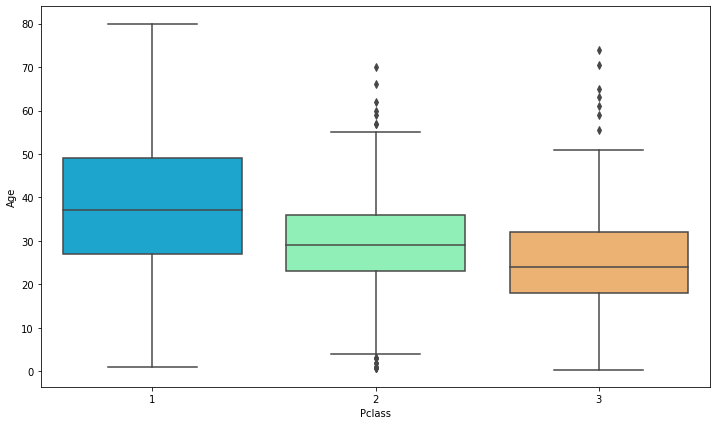

In [528]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age', data=train, palette = 'rainbow')

In [529]:
def impute_age(var):
    Age = var[0]
    Pclass = var[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 29

        else:
            return 25

    else:
        return Age

In [530]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1 )

In [531]:
train['Age'].isnull().value_counts()

False    891
Name: Age, dtype: int64

In [532]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [533]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [534]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

# Encoding Sex Column
train['Sex'] = encode.fit_transform(train['Sex'].values)          

# Encoding Embarked column
train['Embarked'] = encode.fit_transform(train['Embarked'].values)

In [535]:
train['Sex'].unique()

array([1, 0])

In [536]:
train['Embarked'].unique()

array([2, 0, 1])

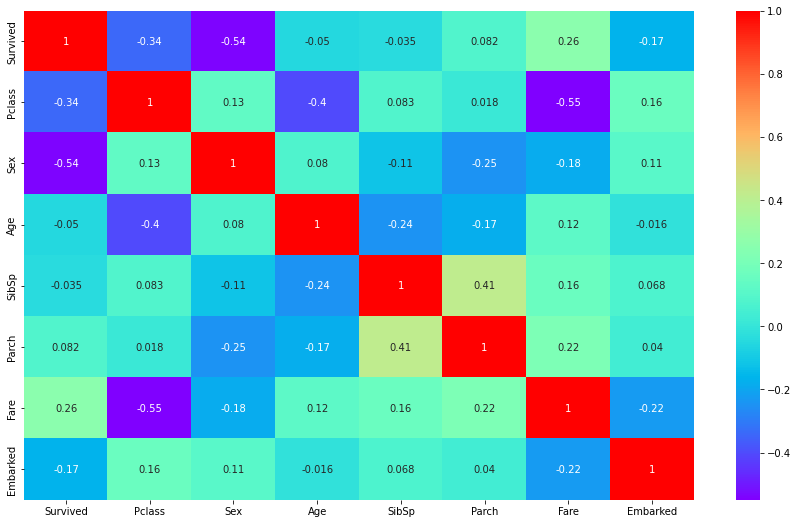

In [537]:
plt.figure(figsize=(15,9))
sns.heatmap(train.corr(),annot=True,cmap="rainbow")

In [538]:
train.groupby('Embarked')[['Survived']].mean()          #0 for c   1 for Q    2 for S 

,Survived
Embarked,
0,0.553571
1,0.389610
2,0.339009


In [539]:
train.groupby('Sex')[['Survived']].mean()         #0 for female  1 for male


,Survived
Sex,
0,0.742038
1,0.188908


In [540]:
train.groupby('Parch')[['Survived']].mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [541]:
train.groupby('SibSp')[['Survived']].mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [542]:
pd.pivot_table(train, index='Survived', values = 'Sex', columns='Pclass')

Pclass,1,2,3
Survived,,,
0,0.962500,0.938144,0.806452
1,0.330882,0.195402,0.394958


In [543]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [544]:
age = pd.cut(train['Age'],[0,18,45,60,80])
train.pivot_table('Survived',['Sex',age],'Pclass')

Pclass               1         2         3
Sex Age                                   
0   (0, 18]   0.909091  1.000000  0.511628
    (18, 45]  0.984127  0.909091  0.500000
    (45, 60]  0.944444  0.857143  0.000000
    (60, 80]  1.000000       NaN  1.000000
1   (0, 18]   0.800000  0.600000  0.215686
    (18, 45]  0.400000  0.090909  0.128114
    (45, 60]  0.333333  0.000000  0.000000
    (60, 80]  0.083333  0.333333  0.000000

In [545]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [546]:
# train test split
X = train.drop(columns=['Survived'])
y = train['Survived']

In [547]:
# Split dataset into 80% Training and 20% Testing
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2, random_state=0)

In [548]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [549]:
# Creating Machine Learning Models

def mlmodels(X_train,y_train):
  
  # Using Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train,y_train)

  # Using KNN
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5 )
  knn.fit(X_train, y_train)

  #USing Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(random_state = 0)
  tree.fit(X_train, y_train)

  # Using Random Forest
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10, random_state = 0)
  forest.fit(X_train, y_train)

  # Using SVC
  from sklearn import svm
  svc = svm.SVC(kernel='linear')
  svc.fit(X_train, y_train)

  #Printing accuracy
  print('Log_Reg Accuracy : ',log.score(X_train,y_train))
  print("KNN Accuracy : ",knn.score(X_train,y_train))
  print("Dec_Tree Accuracy : ",tree.score(X_train,y_train))
  print("Ran_For Accuracy : ",forest.score(X_train,y_train))
  print("SVC Accuracy : ",svc.score(X_train,y_train))

  return log , knn , tree , forest , svc

In [550]:
model = mlmodels(X_train , y_train)

Log_Reg Accuracy :  0.8075842696629213
KNN Accuracy :  0.8651685393258427
Dec_Tree Accuracy :  0.9817415730337079
Ran_For Accuracy :  0.9676966292134831
SVC Accuracy :  0.7865168539325843


In [551]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

for i in range( len(model) ):
  cm = confusion_matrix(y_test,model[i].predict(X_test))

  TN, FP, FN, TP = confusion_matrix(y_test,model[i].predict(X_test)).ravel() 

  test_score = ( TP + TN ) / ( TP + TN + FN + FP )

  cros_score = cross_val_score(model[i], X, y, cv=5)

  print(cm)
  print('Model[{}] Testing  Accuracy  = "{}"'.format(i,test_score))
  print('Model[{}] Cross Validation  = "{}"'.format(i,cros_score))
  print()


[[94 16]
 [19 50]]
Model[0] Testing  Accuracy  = "0.8044692737430168"
Model[0] Cross Validation  = "[0.77653631 0.80898876 0.79775281 0.78089888 0.82022472]"

[[99 11]
 [22 47]]
Model[1] Testing  Accuracy  = "0.8156424581005587"
Model[1] Cross Validation  = "[0.68156425 0.68539326 0.70786517 0.74719101 0.70786517]"

[[96 14]
 [23 46]]
Model[2] Testing  Accuracy  = "0.7932960893854749"
Model[2] Cross Validation  = "[0.74860335 0.76404494 0.80898876 0.73595506 0.80898876]"

[[101   9]
 [ 19  50]]
Model[3] Testing  Accuracy  = "0.8435754189944135"
Model[3] Cross Validation  = "[0.77653631 0.79213483 0.84269663 0.76404494 0.79775281]"

[[92 18]
 [20 49]]
Model[4] Testing  Accuracy  = "0.7877094972067039"
Model[4] Cross Validation  = "[0.80446927 0.80898876 0.78651685 0.75280899 0.78651685]"



In [552]:
# Get feature importance
tree= model[3]
importances = pd.DataFrame({'feature': train.iloc[:,1:8].columns, 'importance':np.round(tree.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances 

,importance
feature,
Sex,0.279
Age,0.263
Fare,0.258
Pclass,0.082
SibSp,0.055
Parch,0.035
Embarked,0.028


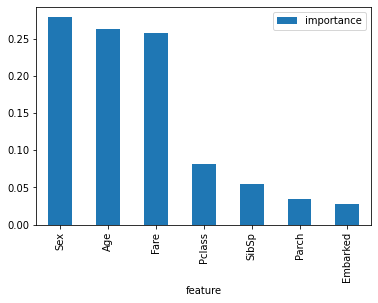

In [553]:
importances.plot.bar()

In [554]:
# Get the Predictions
predictions = model[3].predict(X_test)
print(predictions,end='\n''\n')
print(y_test.to_numpy())

[0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0
 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1]

[0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [555]:
# Training with full data                                                 
from sklearn.ensemble import RandomForestClassifier
final_forest = RandomForestClassifier(n_estimators=10, random_state = 0)
final_forest.fit(X, y)

RandomForestClassifier(n_estimators=10, random_state=0)

In [556]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [557]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [558]:
test = test.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1)

In [559]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

# Encoding Sex Column
test['Sex'] = encode.fit_transform(test['Sex'].values)          

# Encoding Embarked column
test['Embarked'] = encode.fit_transform(test['Embarked'].values)

In [560]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1 )

In [561]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [562]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [563]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [564]:
test['Fare']=test['Fare'].fillna(test['Fare'].mode()[0])

In [565]:
prediction2 = final_forest.predict(test)
prediction2

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

**Submission**

In [566]:
submission = pd.read_csv('gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [567]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [568]:
submission['Survived'] = prediction2

In [569]:
submission.to_csv('Submission.csv' , index = False)

In [572]:
! kaggle competitions submit -c titanic -f /content/Submission.csv -m test_submission2

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
